In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # charts
import statistics # median, mean, etc.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Measures of central tendency and dispersion**

In [2]:
# CSV download
url_amz="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_amazon.csv"
!wget {url_amz} -q -O precios_amazon.csv
url_eth="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_ethereum.csv"
!wget {url_eth} -q -O precios_ethereum.csv

In [3]:
# Load and check the dataframes
df_amz = pd.read_csv('precios_amazon.csv', sep=';', decimal=',')
df_eth = pd.read_csv('precios_ethereum.csv', sep=';', decimal=',')

print(df_amz.describe())
print(df_eth.describe())

              Open         High          Low        Close    Adj Close  \
count   295.000000   295.000000   295.000000   295.000000   295.000000   
mean   3302.138885  3338.047183  3263.254206  3299.830896  3299.839902   
std     195.144908   191.478427   201.148439   197.082087   197.078674   
min    2733.669922  2805.000000  2671.449951  2720.290039  2720.290039   
25%    3185.515015  3230.369995  3158.119995  3192.494995  3192.494995   
50%    3317.000000  3347.800049  3288.899902  3312.530029  3312.530029   
75%    3424.905029  3461.430054  3394.885010  3430.170044  3430.170044   
max    3744.000000  3773.080078  3696.790039  3731.409912  3731.409912   

             Volume  
count  2.950000e+02  
mean   3.472632e+06  
std    1.377987e+06  
min    1.680300e+06  
25%    2.582100e+06  
50%    3.185300e+06  
75%    3.895600e+06  
max    1.267280e+07  
       Unnamed: 0.1  Unnamed: 0         Open         High          Low  \
count    425.000000  425.000000   425.000000   425.000000   4

In [4]:
len(df_amz)

295

In [5]:
len(df_eth)

425

In [6]:
def discard_days(df, days):
    """ Discard elements from the dataframe if they are included in the days list """
    # Make a copy to prevent changes in the original one
    df_discard = df.copy()
    
    # reset the index
    df_discard.reset_index(inplace=True)

    # modify the format of the data in the column 'Date' to datetime
    df_discard['Date'] = pd.to_datetime(df_discard['Date'])

    # crea una nueva columna con los días de la semana a partir de la columna 'Date'
    df_discard['Day'] = df_discard["Date"].dt.day_name()

    # descartar días que esten en la lista 'days'
    df_discard = df_discard.loc[~df_discard['Day'].isin(days)]

    return df_discard

In [7]:
df_eth_week = discard_days(df_eth, ['Saturday', 'Sunday'])

In [8]:
# We have killed the weekends from the DataFrame
len(df_eth_week) 

# We could also clear the festives in which Amazon is not operating in the stock market... but is not necessary for the purpose of this small exercise

304

In [9]:
# Get Amazon's daily closing price
prices_amz = df_amz['Close'].tolist()
prices_eth = df_eth_week['Close'].tolist()

In [10]:


# Amazon
median_amz = round(statistics.median(prices_amz))
mean_amz = round(statistics.mean(prices_amz))        
print(f"Amazon. Median: {median_amz}, Mean: {mean_amz}")

prices_amz_red = []
for value in prices_amz:
    prices_amz_red.append(round(value))
    


# Ethereum
median_eth = round(statistics.median(prices_eth))
mean_eth = round(statistics.mean(prices_eth))
print(f"Ethereum. Median: {median_eth}, Mean: {mean_eth}")


prices_eth_red = []
for value in prices_eth:
    prices_eth_red.append(round(value))

Amazon. Median: 3313, Mean: 3300
Ethereum. Median: 2885, Mean: 2927


In [11]:
# Just for fun, get the median "manually"
# Amazon's
pric_amz_ord = sorted(prices_amz)
amz_len = round(len(pric_amz_ord) / 2)
median_amz = round(pric_amz_ord[amz_len])
print(f"Amazon's Median: {median_amz}")


# Ethereum's
pric_eth_ord = sorted(prices_eth)
eth_len = round(len(pric_eth_ord) / 2)
median_eth = round(pric_eth_ord[eth_len])
print(f"Ethereum's Median: {median_eth}")


Amazon's Median: 3313
Ethereum's Median: 2889


In [12]:
counter_amz = {}

for key in prices_amz_red:
    if key in counter_amz:
        counter_amz[key] += 1
    else:
        counter_amz[key] = 1

counter_eth = {}

for key in prices_eth_red:
    if key in counter_eth:
        counter_eth[key] += 1
    else:
        counter_eth[key] = 1


mode_amz = max(counter_amz, key=counter_amz.get)
mode_eth = max(counter_eth, key=counter_eth.get)

In [13]:
print(f"Amazon mode: {mode_amz}")
print(f"Ethereum mode: {mode_eth}")

Amazon mode: 3224
Ethereum mode: 2590


In [14]:
pd.DataFrame(
    [
        [median_amz, mean_amz, mode_amz],
        [median_eth, mean_eth, mode_eth]
    ],
    index=['AMZ', 'ETH'],
    columns=['Median', 'Mean', 'Mode']
)

,Median,Mean,Mode
AMZ,3313,3300,3224
ETH,2889,2927,2590


**Histogram chart**

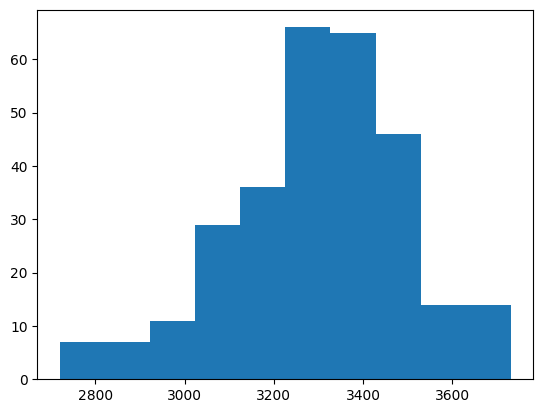

In [15]:
plt.hist(prices_amz)
plt.show()

Amazon's variance: 38709.683606697006
Ethereum's variance: 722817.4747446611
Amazon's coefficient of variation (CV): 0.05938658812533453
Ethereum's coefficient of variation (CV): 0.29428408769100134


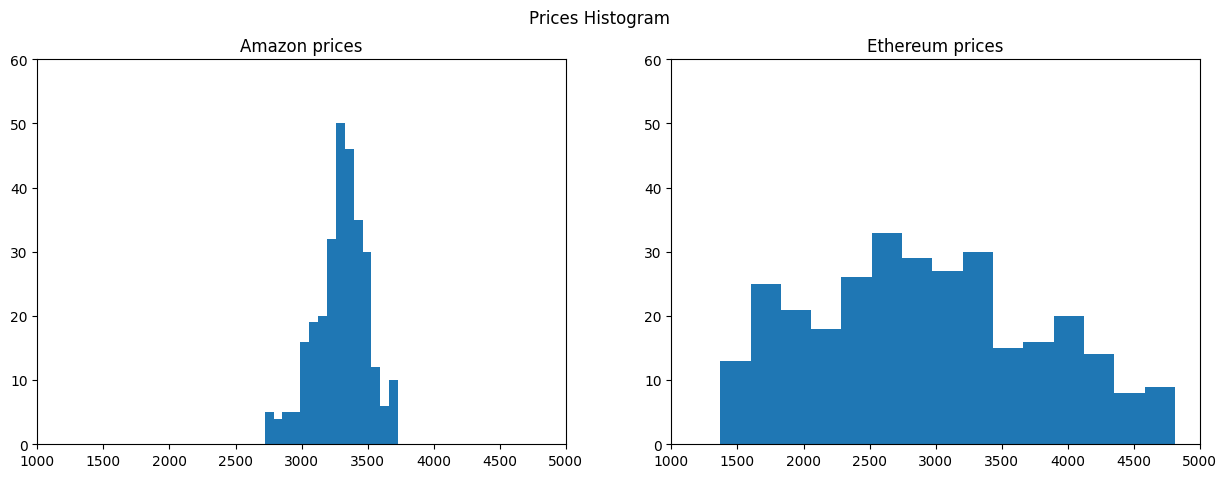

In [16]:
# We set the histograms up in a way that we are comparing them the right way
# without distortions

# 2 histograms is better than one, we use plt.subplots for that purpose
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) 
ax1.hist(prices_amz, bins=15)    # AMZ histogram. dataframe, num of bins
ax1.set_title('Amazon prices')   # title
ax1.set_xlim(1000, 5000)         # personalize X rank
ax1.set_ylim(0, 60)              # personalize Y rank

ax2.hist(prices_eth, bins=15)    # ETH histogram
ax2.set_title('Ethereum prices')
ax2.set_xlim(1000, 5000)
ax2.set_ylim(0, 60)

fig.suptitle('Prices Histogram') # just a fancy title

# And there we can see that the AMZ price is much less volatile than ETH
# as the variance will confirm
AMZ_variance = np.var(prices_amz)
print(f"Amazon's variance: {AMZ_variance}")

ETH_variance = np.var(prices_eth)
print(f"Ethereum's variance: {ETH_variance}")

# But never compare variance of numbers with different scales.. 
#(ETH price is very different from AMZ's..)... let's rely on the 
# coefficient of variation (CV = std / mean)
amz_cv = np.sqrt(AMZ_variance) / median_amz
print(f"Amazon's coefficient of variation (CV): {amz_cv}")

eth_cv = np.sqrt(ETH_variance) / median_eth
print(f"Ethereum's coefficient of variation (CV): {eth_cv}")

# Here we can compare apples with apples (AMZ CV = 0.059, ETH CV = 0.29)
# so f**k yeah, ETH has a much higher variance (quite obvious  by now)

**Dispersion measures**
* Maximum
* Minimum
* Third quartile (Q3)
* Second quartile (Q2 - mean)
* First quaritle (Q1)
* Minimum

In [17]:
# Data to play with
data = [110, 105, 100, 840, 95, 100, 120, 250, 12, 9, 12, 33]

# Sort from small to big
data.sort()
print(data)

median = np.median(data) # 12 elements, = (100 + 100) / 2 = 100
q1 = np.quantile(data, 0.25, method='midpoint') # (33 + 12) / 2 = 22.5
q3 = np.quantile(data, 0.75, method='midpoint') # (110 + 120) / 2 = 115

print('Median = Q2: ', median)
print('Max: ', max(data))
print('Min: ', min(data))
print('Q1: ', q1)
print('Q3: ', q3)
print('Range: ', max(data) - min(data))
print('Interquartile range (IQR) = Q3-Q1: ', q3 - q1)


[9, 12, 12, 33, 95, 100, 100, 105, 110, 120, 250, 840]
Median = Q2:  100.0
Max:  840
Min:  9
Q1:  22.5
Q3:  115.0
Range:  831
Interquartile range (IQR) = Q3-Q1:  92.5
